In [1]:
import pandas as pd
import sys  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
pd.set_option('display.max_rows', None)  # 행 제한 해제
pd.set_option('display.max_columns', None)  # 열 제한 해제
pd.set_option('display.width', None)  # 너비 제한 해제

In [3]:
import platform
import matplotlib.pyplot as plt
from matplotlib import rc

def set_korean_font():
    os_name = platform.system()

    if os_name == "Darwin":        # macOS
        rc("font", family="AppleGothic")
    elif os_name == "Windows":     # Windows
        rc("font", family="Malgun Gothic")   # 윈도우 기본 한글 글꼴
    else:                          # Linux 등
        # 시스템에 설치된 한글 글꼴 예시 ─ 필요시 apt/yum, brew, winget 등으로 설치
        rc("font", family="NanumGothic")

    # 마이너스 기호가 ◻ 로 나오는 문제 방지
    plt.rcParams["axes.unicode_minus"] = False

# 호출
set_korean_font()

In [4]:
df = pd.read_csv('../data/train.csv')


df.head()


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [6]:
building = pd.read_csv('../data/building_info.csv')



building.head()


,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


In [7]:
# '-' 처리 및 숫자형 변환 + 결측치 채우기
# 0으로 바꾼 이유는 태양광, ESS, PCS 용량이 없는 건물도 있을 수 있기 때문
# 중앙값이나 평균값으로 채우는 방법도 있지만, 이 경우에는 0으로 처리
for col in ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 필요한 열만 추출
static_features = building[['건물번호', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']]

# merge 수행 (왼쪽 기준: df)
merged_df = df.merge(static_features, on='건물번호', how='left')


In [8]:


counts = df['강수량(mm)'].value_counts()
print(counts)

강수량(mm)
0.0      185388
0.1        2449
0.2        1592
0.3        1178
0.4         893
0.5         860
0.7         676
0.6         593
0.8         468
0.9         380
1.0         358
1.1         322
1.4         285
1.5         282
1.2         278
1.9         275
1.3         249
1.7         215
1.6         199
1.8         185
2.7         161
2.2         153
2.3         150
2.6         146
3.5         146
2.9         145
2.8         144
2.1         136
3.0         136
2.4         135
3.7         131
3.6         130
3.3         123
3.8         123
3.2         122
2.5         122
3.1         119
3.4         115
4.0         112
2.0          99
4.9          87
4.8          83
4.1          82
3.9          81
8.1          78
4.5          77
4.4          76
5.2          76
5.1          72
7.2          72
5.0          71
5.5          70
5.9          69
5.6          65
7.7          63
7.3          61
4.6          59
4.2          56
12.3         52
6.4          51
14.0         51
6.1          51


In [9]:
# merge 제대로 되었는지 확인
print(merged_df.columns)
print(merged_df.head())


Index(['num_date_time', '건물번호', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', '태양광용량(kW)', 'ESS저장용량(kWh)',
       'PCS용량(kW)'],
      dtype='object')
   num_date_time  건물번호           일시  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20240601 00     1  20240601 00    18.3      0.0      2.6   82.0     0.0   
1  1_20240601 01     1  20240601 01    18.3      0.0      2.7   82.0     0.0   
2  1_20240601 02     1  20240601 02    18.1      0.0      2.6   80.0     0.0   
3  1_20240601 03     1  20240601 03    18.0      0.0      2.6   81.0     0.0   
4  1_20240601 04     1  20240601 04    17.8      0.0      1.3   81.0     0.0   

   일사(MJ/m2)  전력소비량(kWh)  태양광용량(kW)  ESS저장용량(kWh)  PCS용량(kW)  
0        0.0     5794.80        0.0           0.0        0.0  
1        0.0     5591.85        0.0           0.0        0.0  
2        0.0     5338.17        0.0           0.0        0.0  
3        0.0     4554.42        0.0           0.0        0.0  
4        

In [10]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(°C)         204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(°C)         16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 918.9+ KB


In [12]:
train = train.drop(columns=['일조(hr)', '일사(MJ/m2)'])  # 일조와 일사 열 제거

train['is_train'] = 1
test['is_train'] = 0

combined_df = pd.concat([train, test], ignore_index=True)

combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   건물번호           220800 non-null  int64  
 2   일시             220800 non-null  object 
 3   기온(°C)         220800 non-null  float64
 4   강수량(mm)        220800 non-null  float64
 5   풍속(m/s)        220800 non-null  float64
 6   습도(%)          220800 non-null  float64
 7   전력소비량(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  220800 non-null  object 
 1   건물번호           220800 non-null  int64  
 2   일시             220800 non-null  object 
 3   기온(°C)         220800 non-null  float64
 4   강수량(mm)        220800 non-null  float64
 5   풍속(m/s)        220800 non-null  float64
 6   습도(%)          220800 non-null  float64
 7   전력소비량(kWh)     204000 non-null  float64
 8   is_train       220800 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.2+ MB


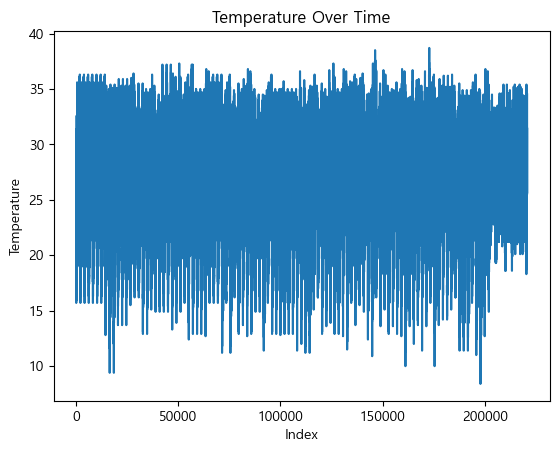

In [14]:
temp = combined_df['기온(°C)'] 

sns.lineplot(x=temp.index, y=temp.values)
plt.title('Temperature Over Time')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.show()


Text(0.5, 1.0, 'Temperature Distribution')

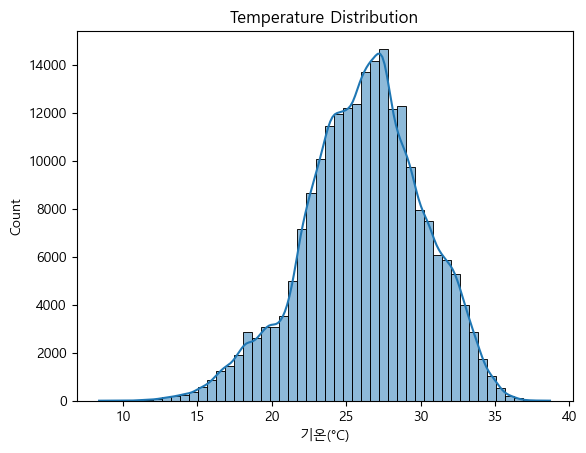

In [15]:
sns.histplot(temp, kde=True, bins=50)
plt.title('Temperature Distribution')

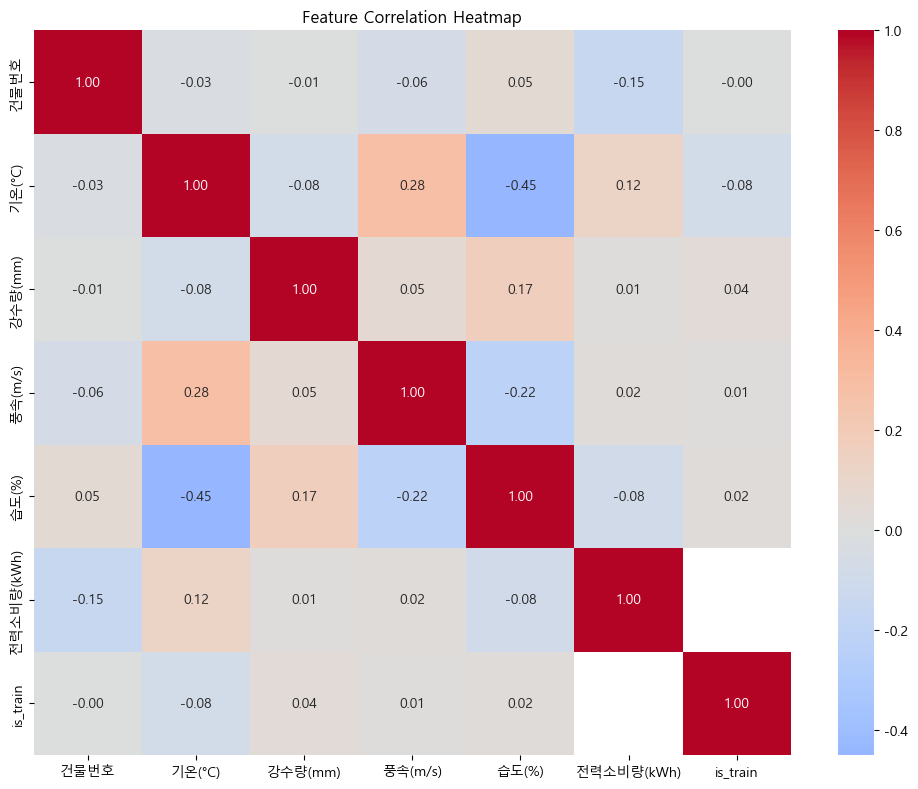

In [16]:

# 수치형 열만 추출 (문자형, 날짜형 제외)
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns

# 상관계수 행렬
corr = combined_df[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [17]:

# 2. '-' 값을 NaN으로, 그 후 0으로 대체
cols_to_convert = ['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']
for col in cols_to_convert:
    building[col] = pd.to_numeric(building[col].replace('-', np.nan))
    building[col] = building[col].fillna(0)

# 3. 필요한 열만 merge
merged_df = combined_df.merge(
    building[['건물번호'] + cols_to_convert],
    on='건물번호',
    how='left'
)

In [18]:
print(merged_df[cols_to_convert].describe())  # 값 분포 확인
print(merged_df.isnull().sum())              # NaN 여부 확인


           태양광용량(kW)  ESS저장용량(kWh)      PCS용량(kW)
count  220800.000000  220800.00000  220800.000000
mean      231.792200     116.30800      58.270000
std       419.067099     455.25775     219.863812
min         0.000000       0.00000       0.000000
25%         0.000000       0.00000       0.000000
50%        28.125000       0.00000       0.000000
75%       228.670000       0.00000       0.000000
max      1983.050000    3100.00000    1500.000000
num_date_time        0
건물번호                 0
일시                   0
기온(°C)               0
강수량(mm)              0
풍속(m/s)              0
습도(%)                0
전력소비량(kWh)       16800
is_train             0
태양광용량(kW)            0
ESS저장용량(kWh)         0
PCS용량(kW)            0
dtype: int64


In [19]:
merged_df['일시'] = pd.to_datetime(merged_df['일시'], format='%Y%m%d %H')


In [20]:

# 2. 시간 기반 파생 피처
merged_df['hour'] = merged_df['일시'].dt.hour                   # 시간대 (0~23)
merged_df['dayofweek'] = merged_df['일시'].dt.dayofweek         # 요일 (월=0 ~ 일=6)
merged_df['month'] = merged_df['일시'].dt.month                 # 월 (1~12)
merged_df['is_weekend'] = (merged_df['dayofweek'] >= 5).astype(int)  # 주말 여부

# 3. 계절 정보
def get_season(month):
    if month in [3, 4, 5]: return 1  # 봄
    elif month in [6, 7, 8]: return 2  # 여름
    elif month in [9, 10, 11]: return 3  # 가을
    else: return 4  # 겨울

merged_df['season'] = merged_df['month'].map(get_season)

# 4. 설비 설치 여부 (0/1)
merged_df['has_solar'] = (merged_df['태양광용량(kW)'] > 0).astype(int)
merged_df['has_ess'] = (merged_df['ESS저장용량(kWh)'] > 0).astype(int)
merged_df['has_pcs'] = (merged_df['PCS용량(kW)'] > 0).astype(int)

# 5. 상호작용 피처 (기온 × 설비)
merged_df['기온x태양광'] = merged_df['기온(°C)'] * merged_df['has_solar']
merged_df['기온xESS'] = merged_df['기온(°C)'] * merged_df['has_ess']

# 6. 체감온도 (Simplified version)
merged_df['체감온도'] = merged_df['기온(°C)'] - ((0.55 - 0.0055 * merged_df['습도(%)']) * (merged_df['기온(°C)'] - 14.5))

# 7. 불쾌지수 (Discomfort Index)
merged_df['불쾌지수'] = 0.81 * merged_df['기온(°C)'] + 0.01 * merged_df['습도(%)'] * (0.99 * merged_df['기온(°C)'] - 14.3) + 46.3

# 8. 전력소비량은 train에만 존재하므로 제외 대상
# 9. 최종적으로 사용하지 않을 열 제거 가능

In [21]:
merged_df.info()  # 최종 데이터프레임 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220800 entries, 0 to 220799
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  220800 non-null  object        
 1   건물번호           220800 non-null  int64         
 2   일시             220800 non-null  datetime64[ns]
 3   기온(°C)         220800 non-null  float64       
 4   강수량(mm)        220800 non-null  float64       
 5   풍속(m/s)        220800 non-null  float64       
 6   습도(%)          220800 non-null  float64       
 7   전력소비량(kWh)     204000 non-null  float64       
 8   is_train       220800 non-null  int64         
 9   태양광용량(kW)      220800 non-null  float64       
 10  ESS저장용량(kWh)   220800 non-null  float64       
 11  PCS용량(kW)      220800 non-null  float64       
 12  hour           220800 non-null  int32         
 13  dayofweek      220800 non-null  int32         
 14  month          220800 non-null  int32         
 15  

In [22]:
merged_df.head()  # 최종 데이터프레임 확인


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),is_train,태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),hour,dayofweek,month,is_weekend,season,has_solar,has_ess,has_pcs,기온x태양광,기온xESS,체감온도,불쾌지수
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,5794.80,1,0.0,0.0,0.0,0,5,6,1,2,0,0,0,0.0,0.0,17.92380,64.25294
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,5591.85,1,0.0,0.0,0.0,1,5,6,1,2,0,0,0,0.0,0.0,17.92380,64.25294
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,5338.17,1,0.0,0.0,0.0,2,5,6,1,2,0,0,0,0.0,0.0,17.70400,63.85620
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,4554.42,1,0.0,0.0,0.0,3,5,6,1,2,0,0,0,0.0,0.0,17.63425,63.73120
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,3602.25,1,0.0,0.0,0.0,4,5,6,1,2,0,0,0,0.0,0.0,17.45515,63.40882


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler
from tqdm.auto import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

def smape(y_true, y_pred):
    """SMAPE (Symmetric Mean Absolute Percentage Error) 계산"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

class AdvancedStackingEnsemble:
    def __init__(self, cv_folds=5, random_state=42, max_features=None):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.max_features = max_features
        self.scaler = RobustScaler()
        self.standard_scaler = StandardScaler()
        
        # Base Model 파라미터 (필수만)
        self.lgbm_params = {
            'objective': 'regression',
            'metric': 'mae',
            'num_leaves': 63,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'device_type': 'cpu',
            'verbose': -1,
            'early_stopping_rounds': 100
        }
        
        self.xgb_params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'tree_method': 'hist',
            'verbosity': 0,
            'early_stopping_rounds': 100
        }
        
        self.catboost_params = {
            'objective': 'RMSE',
            'eval_metric': 'MAE',
            'depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bylevel': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'verbose': False,
            'early_stopping_rounds': 100
        }
        
        # 추가 Base Models
        self.rf_params = {
            'n_estimators': 500,
            'max_depth': 8,
            'min_samples_split': 5,
            'min_samples_leaf': 2,
            'random_state': random_state,
            'n_jobs': -1
        }
        
        self.et_params = {
            'n_estimators': 500,
            'max_depth': 8,
            'min_samples_split': 5,
            'min_samples_leaf': 2,
            'random_state': random_state,
            'n_jobs': -1
        }
    
    def prepare_data(self, df):
        """데이터 준비 및 피처 엔지니어링"""
        drop_cols = ['num_date_time', '일시', 'is_train']
        target_col = '전력소비량(kWh)'
        
        # 훈련/테스트 데이터 분리
        train_df = df[df['is_train'] == 1].copy()
        test_df = df[df['is_train'] == 0].copy()
        
        # 특성과 타겟 분리
        X_train = train_df.drop(columns=drop_cols + [target_col])
        y_train = train_df[target_col]
        X_test = test_df.drop(columns=drop_cols + [target_col])
        
        # max_features가 설정된 경우 피처 선택
        if self.max_features and self.max_features < X_train.shape[1]:
            print(f"피처 선택: {X_train.shape[1]}개 -> {self.max_features}개")
            correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
            top_features = correlations.head(self.max_features).index.tolist()
            X_train = X_train[top_features]
            X_test = X_test[top_features]
        
        print(f"데이터 준비: 훈련 {X_train.shape}, 테스트 {X_test.shape}")
        print(f"사용된 피처 수: {X_train.shape[1]}개")
        
        # 수치형/범주형 피처 분리
        numeric_features = X_train.select_dtypes(include=[np.number]).columns
        categorical_features = X_train.select_dtypes(exclude=[np.number]).columns
        
        print(f"수치형 피처: {len(numeric_features)}개, 범주형 피처: {len(categorical_features)}개")
        
        # 스케일링된 데이터 준비
        X_train_scaled, X_test_scaled = self._scale_data(X_train, X_test, numeric_features, categorical_features)
        X_train_std, X_test_std = self._standard_scale_data(X_train, X_test, numeric_features, categorical_features)
        
        return {
            'original': (X_train, X_test),
            'robust_scaled': (X_train_scaled, X_test_scaled),
            'standard_scaled': (X_train_std, X_test_std),
            'target': y_train
        }
    
    def _scale_data(self, X_train, X_test, numeric_features, categorical_features):
        """RobustScaler를 사용한 스케일링"""
        if len(numeric_features) > 0:
            X_train_numeric = X_train[numeric_features]
            X_test_numeric = X_test[numeric_features]
            
            X_train_scaled_values = self.scaler.fit_transform(X_train_numeric)
            X_test_scaled_values = self.scaler.transform(X_test_numeric)
            
            X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=numeric_features, index=X_train.index)
            X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=numeric_features, index=X_test.index)
            
            if len(categorical_features) > 0:
                X_train_final = pd.concat([X_train_scaled, X_train[categorical_features]], axis=1)
                X_test_final = pd.concat([X_test_scaled, X_test[categorical_features]], axis=1)
            else:
                X_train_final = X_train_scaled
                X_test_final = X_test_scaled
        else:
            X_train_final = X_train
            X_test_final = X_test
        
        return X_train_final, X_test_final
    
    def _standard_scale_data(self, X_train, X_test, numeric_features, categorical_features):
        """StandardScaler를 사용한 스케일링"""
        if len(numeric_features) > 0:
            X_train_numeric = X_train[numeric_features]
            X_test_numeric = X_test[numeric_features]
            
            X_train_scaled_values = self.standard_scaler.fit_transform(X_train_numeric)
            X_test_scaled_values = self.standard_scaler.transform(X_test_numeric)
            
            X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=numeric_features, index=X_train.index)
            X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=numeric_features, index=X_test.index)
            
            if len(categorical_features) > 0:
                X_train_final = pd.concat([X_train_scaled, X_train[categorical_features]], axis=1)
                X_test_final = pd.concat([X_test_scaled, X_test[categorical_features]], axis=1)
            else:
                X_train_final = X_train_scaled
                X_test_final = X_test_scaled
        else:
            X_train_final = X_train
            X_test_final = X_test
        
        return X_train_final, X_test_final
    
    def train_base_models(self, data_dict):
        """Base Models 훈련 (Level 1)"""
        X_train_orig, X_test_orig = data_dict['original']
        X_train_robust, X_test_robust = data_dict['robust_scaled']
        X_train_std, X_test_std = data_dict['standard_scaled']
        y_train = data_dict['target']
        
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        
        # Base model 예측을 저장할 배열
        n_train = len(X_train_orig)
        n_test = len(X_test_orig)
        
        base_models = {
            'lgbm': {'data': 'robust_scaled', 'params': self.lgbm_params},
            'xgb': {'data': 'original', 'params': self.xgb_params},
            'catboost': {'data': 'original', 'params': self.catboost_params},
            'rf': {'data': 'original', 'params': self.rf_params},
            'et': {'data': 'robust_scaled', 'params': self.et_params}
        }
        
        oof_predictions = {}
        test_predictions = {}
        model_scores = {}
        
        for model_name, config in base_models.items():
            print(f"\n=== {model_name.upper()} 훈련 시작 ===")
            
            # 데이터 선택
            if config['data'] == 'robust_scaled':
                X_tr, X_te = X_train_robust, X_test_robust
            elif config['data'] == 'standard_scaled':
                X_tr, X_te = X_train_std, X_test_std
            else:
                X_tr, X_te = X_train_orig, X_test_orig
            
            oof_preds = np.zeros(n_train)
            test_preds = np.zeros(n_test)
            fold_scores = []
            
            for fold, (train_idx, val_idx) in enumerate(kf.split(X_tr)):
                X_fold_train, X_fold_val = X_tr.iloc[train_idx], X_tr.iloc[val_idx]
                y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
                
                # 모델 생성 및 훈련
                if model_name == 'lgbm':
                    model = LGBMRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train, 
                             eval_set=[(X_fold_val, y_fold_val)],
                             callbacks=[lgbm.log_evaluation(period=0)])
                elif model_name == 'xgb':
                    model = XGBRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train,
                             eval_set=[(X_fold_val, y_fold_val)], verbose=False)
                elif model_name == 'catboost':
                    model = CatBoostRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train,
                             eval_set=[(X_fold_val, y_fold_val)])
                elif model_name == 'rf':
                    model = RandomForestRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train)
                elif model_name == 'et':
                    model = ExtraTreesRegressor(**config['params'])
                    model.fit(X_fold_train, y_fold_train)
                
                # 예측
                val_pred = model.predict(X_fold_val)
                oof_preds[val_idx] = val_pred
                test_preds += model.predict(X_te) / self.cv_folds
                
                fold_score = smape(y_fold_val, val_pred)
                fold_scores.append(fold_score)
                print(f"Fold {fold + 1}: {fold_score:.4f}")
            
            avg_score = np.mean(fold_scores)
            print(f"평균 SMAPE: {avg_score:.4f} (±{np.std(fold_scores):.4f})")
            
            oof_predictions[model_name] = oof_preds
            test_predictions[model_name] = test_preds
            model_scores[model_name] = avg_score
        
        return oof_predictions, test_predictions, model_scores
    
    def train_meta_models(self, oof_predictions, y_train):
        """Meta Models 훈련 (Level 2)"""
        print(f"\n=== META MODELS 훈련 시작 ===")
        
        # Level 1 예측을 입력으로 사용
        meta_features = np.column_stack(list(oof_predictions.values()))
        
        # 다양한 Meta Model 정의
        meta_models = {
            'ridge': Ridge(alpha=0.01, random_state=self.random_state),
            'lasso': Lasso(alpha=0.01, random_state=self.random_state),
            'elastic': ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=self.random_state),
            'lgbm_meta': LGBMRegressor(
                objective='regression',
                metric='mae',
                num_leaves=15,
                learning_rate=0.1,
                n_estimators=200,
                random_state=self.random_state,
                verbose=-1
            ),
            'xgb_meta': XGBRegressor(
                objective='reg:squarederror',
                eval_metric='mae',
                max_depth=3,
                learning_rate=0.1,
                n_estimators=200,
                random_state=self.random_state,
                verbosity=0
            )
        }
        
        # Meta Model 교차 검증
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        meta_scores = {}
        trained_meta_models = {}
        
        for meta_name, meta_model in meta_models.items():
            fold_scores = []
            
            for fold, (train_idx, val_idx) in enumerate(kf.split(meta_features)):
                X_meta_train, X_meta_val = meta_features[train_idx], meta_features[val_idx]
                y_meta_train, y_meta_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
                
                meta_model_fold = meta_model.__class__(**meta_model.get_params())
                meta_model_fold.fit(X_meta_train, y_meta_train)
                
                val_pred = meta_model_fold.predict(X_meta_val)
                fold_score = smape(y_meta_val, val_pred)
                fold_scores.append(fold_score)
            
            avg_score = np.mean(fold_scores)
            meta_scores[meta_name] = avg_score
            
            # 전체 데이터로 최종 모델 훈련
            final_meta_model = meta_model.__class__(**meta_model.get_params())
            final_meta_model.fit(meta_features, y_train)
            trained_meta_models[meta_name] = final_meta_model
            
            print(f"{meta_name}: {avg_score:.4f}")
        
        return trained_meta_models, meta_scores
    
    def create_ensemble_predictions(self, oof_predictions, test_predictions, 
                                  trained_meta_models, model_scores, y_train):
        """다양한 앙상블 기법으로 최종 예측 생성"""
        print(f"\n=== 앙상블 예측 생성 ===")
        
        # Level 1 test 예측을 meta features로 변환
        meta_test_features = np.column_stack(list(test_predictions.values()))
        
        ensemble_predictions = {}
        ensemble_scores = {}
        
        # 1. 단순 평균
        simple_avg_test = np.mean(list(test_predictions.values()), axis=0)
        simple_avg_oof = np.mean(list(oof_predictions.values()), axis=0)
        ensemble_predictions['simple_average'] = simple_avg_test
        ensemble_scores['simple_average'] = smape(y_train, simple_avg_oof)
        
        # 2. 가중 평균 (성능 기반)
        scores = np.array(list(model_scores.values()))
        weights = 1 / scores
        weights = weights / weights.sum()
        
        weighted_avg_test = np.average(list(test_predictions.values()), weights=weights, axis=0)
        weighted_avg_oof = np.average(list(oof_predictions.values()), weights=weights, axis=0)
        ensemble_predictions['weighted_average'] = weighted_avg_test
        ensemble_scores['weighted_average'] = smape(y_train, weighted_avg_oof)
        
        # 3. 순위 기반 평균
        rank_test_preds = []
        rank_oof_preds = []
        for pred in test_predictions.values():
            rank_test_preds.append(np.argsort(np.argsort(pred)))
        for pred in oof_predictions.values():
            rank_oof_preds.append(np.argsort(np.argsort(pred)))
        
        rank_avg_test = np.mean(rank_test_preds, axis=0)
        rank_avg_oof = np.mean(rank_oof_preds, axis=0)
        ensemble_predictions['rank_average'] = rank_avg_test
        ensemble_scores['rank_average'] = smape(y_train, rank_avg_oof)
        
        # 4. Meta Model 예측들
        for meta_name, meta_model in trained_meta_models.items():
            meta_pred = meta_model.predict(meta_test_features)
            meta_oof = meta_model.predict(np.column_stack(list(oof_predictions.values())))
            
            ensemble_predictions[f'meta_{meta_name}'] = np.maximum(meta_pred, 0)
            ensemble_scores[f'meta_{meta_name}'] = smape(y_train, meta_oof)
        
        # 5. 하이브리드 앙상블 (Meta Model + 가중 평균의 조합)
        best_meta = min(trained_meta_models.items(), 
                       key=lambda x: ensemble_scores[f'meta_{x[0]}'])
        best_meta_name, best_meta_model = best_meta
        
        meta_pred = best_meta_model.predict(meta_test_features)
        hybrid_pred = 0.7 * meta_pred + 0.3 * weighted_avg_test
        hybrid_oof = 0.7 * best_meta_model.predict(np.column_stack(list(oof_predictions.values()))) + 0.3 * weighted_avg_oof
        
        ensemble_predictions['hybrid'] = np.maximum(hybrid_pred, 0)
        ensemble_scores['hybrid'] = smape(y_train, hybrid_oof)
        
        # 모든 예측값을 양수로 클리핑
        for key in ensemble_predictions:
            ensemble_predictions[key] = np.maximum(ensemble_predictions[key], 0)
        
        return ensemble_predictions, ensemble_scores
    
    def fit_predict(self, df):
        """전체 앙상블 파이프라인 실행"""
        print("고급 스태킹 앙상블 모델 시작")
        print("="*60)
        
        # 데이터 준비
        data_dict = self.prepare_data(df)
        
        # Level 1: Base Models 훈련
        oof_predictions, test_predictions, model_scores = self.train_base_models(data_dict)
        
        # Level 2: Meta Models 훈련
        trained_meta_models, meta_scores = self.train_meta_models(oof_predictions, data_dict['target'])
        
        # Level 3: 다양한 앙상블 기법으로 최종 예측
        ensemble_predictions, ensemble_scores = self.create_ensemble_predictions(
            oof_predictions, test_predictions, trained_meta_models, model_scores, data_dict['target']
        )
        
        # 결과 출력
        print(f"\n=== BASE MODEL 성능 ===")
        for model, score in model_scores.items():
            print(f"{model}: {score:.4f}")
        
        print(f"\n=== META MODEL 성능 ===")
        for meta, score in meta_scores.items():
            print(f"{meta}: {score:.4f}")
        
        print(f"\n=== 최종 앙상블 성능 ===")
        for ensemble, score in ensemble_scores.items():
            print(f"{ensemble}: {score:.4f}")
        
        return {
            'predictions': ensemble_predictions,
            'scores': ensemble_scores,
            'base_scores': model_scores,
            'meta_scores': meta_scores
        }
    
    def save_submissions(self, df, results):
        """제출 파일 저장"""
        os.makedirs('../submissions', exist_ok=True)
        test_ids = df[df['is_train'] == 0]['num_date_time'].copy()
        
        predictions = results['predictions']
        scores = results['scores']
        
        for method, pred in predictions.items():
            submission = pd.DataFrame({
                'num_date_time': test_ids,
                'answer': pred
            })
            
            score = scores.get(method, 0)
            filename = f'../submissions/submission_{method}_SMAPE_{score:.4f}.csv'
            submission.to_csv(filename, index=False)
            print(f"저장: {filename}")

# 실행 함수
def run_advanced_stacking_ensemble(merged_df, max_features=None):
    """고급 스태킹 앙상블 모델 실행"""
    print(f"고급 스태킹 앙상블 시작 (최대 피처: {max_features or '제한없음'})")
    print("="*80)
    
    model = AdvancedStackingEnsemble(cv_folds=5, random_state=42, max_features=max_features)
    results = model.fit_predict(merged_df)
    model.save_submissions(merged_df, results)
    
    # 최고 성능 모델 추천
    best_method = min(results['scores'].items(), key=lambda x: x[1])
    print(f"\n🏆 최고 성능: {best_method[0]} (SMAPE: {best_method[1]:.4f})")
    
    return results

# 사용법
print("사용법:")
print("results = run_advanced_stacking_ensemble(merged_df)")
print("results = run_advanced_stacking_ensemble(merged_df, max_features=30)")

사용법:
results = run_advanced_stacking_ensemble(merged_df)
results = run_advanced_stacking_ensemble(merged_df, max_features=30)


In [25]:
results = run_advanced_stacking_ensemble(merged_df)

고급 스태킹 앙상블 시작 (최대 피처: 제한없음)
고급 스태킹 앙상블 모델 시작
데이터 준비: 훈련 (204000, 20), 테스트 (16800, 20)
사용된 피처 수: 20개
수치형 피처: 20개, 범주형 피처: 0개

=== LGBM 훈련 시작 ===
Fold 1: 11.2851
Fold 2: 11.6232
Fold 3: 11.2824
Fold 4: 11.4453
Fold 5: 11.3356
평균 SMAPE: 11.3943 (±0.1287)

=== XGB 훈련 시작 ===
Fold 1: 13.0596
Fold 2: 13.5252
Fold 3: 13.0518
Fold 4: 12.8212
Fold 5: 12.5511
평균 SMAPE: 13.0018 (±0.3211)

=== CATBOOST 훈련 시작 ===
Fold 1: 19.1327
Fold 2: 19.3572
Fold 3: 19.0835
Fold 4: 19.3225
Fold 5: 18.9090
평균 SMAPE: 19.1610 (±0.1643)

=== RF 훈련 시작 ===
Fold 1: 32.0035
Fold 2: 31.6540
Fold 3: 30.9501
Fold 4: 26.4567
Fold 5: 26.8764
평균 SMAPE: 29.5881 (±2.4132)

=== ET 훈련 시작 ===
Fold 1: 45.0087
Fold 2: 45.2816
Fold 3: 45.2376
Fold 4: 45.0962
Fold 5: 44.7403
평균 SMAPE: 45.0729 (±0.1928)

=== META MODELS 훈련 시작 ===
ridge: 11.0658
lasso: 11.0920
elastic: 11.0920
lgbm_meta: 9.3660
xgb_meta: 9.4501

=== 앙상블 예측 생성 ===

=== BASE MODEL 성능 ===
lgbm: 11.3943
xgb: 13.0018
catboost: 19.1610
rf: 29.5881
et: 45.0729

=== META MODEL 성

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import lightgbm as lgbm
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import RobustScaler
from tqdm.auto import tqdm
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP 관련 import
import shap
from shap import TreeExplainer, LinearExplainer

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'DejaVu Sans'

def smape(y_true, y_pred):
    """SMAPE (Symmetric Mean Absolute Percentage Error) 계산"""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

class EnsembleModelWithSHAP:
    def __init__(self, cv_folds=5, random_state=42):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.scaler = RobustScaler()
        
        # 훈련된 모델들을 저장할 변수
        self.trained_models = {
            'lgbm': [],
            'xgb': [],
            'meta': None
        }
        
        # SHAP explainer들을 저장할 변수
        self.explainers = {}
        self.shap_values = {}
        
        # 모델 파라미터
        self.lgbm_params = {
            'objective': 'regression',
            'metric': 'mae',
            'num_leaves': 63,
            'learning_rate': 0.05,
            'feature_fraction': 0.8,
            'bagging_fraction': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'device_type': 'cpu',
            'verbose': -1,
            'early_stopping_rounds': 100
        }
        
        self.xgb_params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'n_estimators': 1000,
            'random_state': random_state,
            'tree_method': 'hist',
            'verbosity': 0,
            'early_stopping_rounds': 100
        }
        
    def prepare_data(self, df):
        """데이터 준비"""
        drop_cols = ['num_date_time', '일시', 'is_train']
        target_col = '전력소비량(kWh)'
        
        # 훈련/테스트 데이터 분리
        train_df = df[df['is_train'] == 1].copy()
        test_df = df[df['is_train'] == 0].copy()
        
        # 특성과 타겟 분리
        X_train = train_df.drop(columns=drop_cols + [target_col])
        y_train = train_df[target_col]
        X_test = test_df.drop(columns=drop_cols + [target_col])
        
        print(f"훈련 데이터: {X_train.shape}, 테스트 데이터: {X_test.shape}")
        
        # 특성명 저장
        self.feature_names = X_train.columns.tolist()
        
        # LightGBM용 스케일링된 데이터
        X_train_scaled = pd.DataFrame(
            self.scaler.fit_transform(X_train),
            columns=X_train.columns, index=X_train.index
        )
        X_test_scaled = pd.DataFrame(
            self.scaler.transform(X_test),
            columns=X_test.columns, index=X_test.index
        )
        
        return X_train, y_train, X_test, X_train_scaled, X_test_scaled
    
    def cross_validate_model(self, model_name, X_train, y_train, X_test, params):
        """단일 모델 교차 검증 (모델 저장 포함)"""
        kf = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        
        oof_preds = np.zeros(len(X_train))
        test_preds = np.zeros(len(X_test))
        scores = []
        
        print(f"=== {model_name.upper()} 교차 검증 ===")
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
            
            # 모델 생성 및 훈련
            if model_name == 'lgbm':
                model = LGBMRegressor(**params)
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], 
                         callbacks=[lgbm.log_evaluation(period=0)])
            else:  # xgb
                model = XGBRegressor(**params)
                model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
            
            # 훈련된 모델 저장
            self.trained_models[model_name].append(model)
            
            # 예측 및 점수 계산
            val_pred = model.predict(X_val)
            oof_preds[val_idx] = val_pred
            test_preds += model.predict(X_test) / self.cv_folds
            
            fold_score = smape(y_val, val_pred)
            scores.append(fold_score)
            print(f"Fold {fold + 1}: {fold_score:.4f}")
        
        avg_score = np.mean(scores)
        print(f"평균 SMAPE: {avg_score:.4f} (±{np.std(scores):.4f})")
        
        return oof_preds, test_preds, avg_score
    
    def fit_predict(self, df):
        """전체 파이프라인 실행"""
        # 데이터 준비
        X_train, y_train, X_test, X_train_scaled, X_test_scaled = self.prepare_data(df)
        
        # 데이터 저장 (SHAP 분석용)
        self.X_train = X_train
        self.X_train_scaled = X_train_scaled
        self.y_train = y_train
        self.X_test = X_test
        self.X_test_scaled = X_test_scaled
        
        # 모델별 교차 검증
        lgbm_oof, lgbm_pred, lgbm_score = self.cross_validate_model(
            'lgbm', X_train_scaled, y_train, X_test_scaled, self.lgbm_params)
        
        xgb_oof, xgb_pred, xgb_score = self.cross_validate_model(
            'xgb', X_train, y_train, X_test, self.xgb_params)
        
        # 앙상블 가중치 계산
        scores = np.array([lgbm_score, xgb_score])
        weights = 1 / scores
        weights = weights / weights.sum()
        
        # 가중 앙상블
        ensemble_pred = weights[0] * lgbm_pred + weights[1] * xgb_pred
        ensemble_pred = np.maximum(ensemble_pred, 0)
        
        # 스태킹 앙상블
        meta_features_train = np.column_stack([lgbm_oof, xgb_oof])
        meta_features_test = np.column_stack([lgbm_pred, xgb_pred])
        
        meta_model = Ridge(alpha=0.01, random_state=self.random_state)
        meta_model.fit(meta_features_train, y_train)
        self.trained_models['meta'] = meta_model
        stacked_pred = np.maximum(meta_model.predict(meta_features_test), 0)
        
        # 보정된 가중 앙상블
        corrected_weights = np.array([0.7, 0.3])
        corrected_pred = corrected_weights[0] * lgbm_pred + corrected_weights[1] * xgb_pred
        corrected_pred = np.maximum(corrected_pred, 0)
        corrected_oof = corrected_weights[0] * lgbm_oof + corrected_weights[1] * xgb_oof
        corrected_oof_score = smape(y_train, corrected_oof)
        
        # OOF 점수 계산
        ensemble_oof = weights[0] * lgbm_oof + weights[1] * xgb_oof
        stacked_oof = meta_model.predict(meta_features_train)
        
        ensemble_oof_score = smape(y_train, ensemble_oof)
        stacked_oof_score = smape(y_train, stacked_oof)
        
        print(f"\n=== 최종 결과 ===")
        print(f"LightGBM: {lgbm_score:.4f}")
        print(f"XGBoost: {xgb_score:.4f}")
        print(f"가중 앙상블: {ensemble_oof_score:.4f} (가중치: {weights[0]:.3f}, {weights[1]:.3f})")
        print(f"보정 앙상블: {corrected_oof_score:.4f} (가중치: 0.700, 0.300)")
        print(f"스태킹 앙상블: {stacked_oof_score:.4f}")
        
        return {
            'weighted': ensemble_pred,
            'stacked': stacked_pred,
            'corrected': corrected_pred,
            'scores': {
                'weighted': ensemble_oof_score,
                'stacked': stacked_oof_score,
                'corrected': corrected_oof_score
            }
        }
    
    def calculate_shap_values(self, model_type='lgbm', fold_idx=0, sample_size=1000):
        """SHAP 값 계산"""
        if not self.trained_models[model_type]:
            raise ValueError(f"{model_type} 모델이 훈련되지 않았습니다.")
        
        print(f"\n=== {model_type.upper()} SHAP 값 계산 중... ===")
        
        # 모델과 데이터 선택
        model = self.trained_models[model_type][fold_idx]
        
        if model_type == 'lgbm':
            X_data = self.X_train_scaled
            X_test_data = self.X_test_scaled
        else:  # xgb
            X_data = self.X_train
            X_test_data = self.X_test
        
        # 샘플 데이터 선택 (계산 속도 향상을 위해)
        if len(X_data) > sample_size:
            sample_indices = np.random.RandomState(self.random_state).choice(
                len(X_data), sample_size, replace=False)
            X_sample = X_data.iloc[sample_indices]
        else:
            X_sample = X_data
        
        # Tree explainer 생성
        explainer = TreeExplainer(model, X_sample)
        self.explainers[model_type] = explainer
        
        # SHAP 값 계산 (훈련 데이터)
        shap_values_train = explainer.shap_values(X_sample)
        
        # SHAP 값 계산 (테스트 데이터 - 일부만)
        test_sample_size = min(500, len(X_test_data))
        X_test_sample = X_test_data.iloc[:test_sample_size]
        shap_values_test = explainer.shap_values(X_test_sample)
        
        self.shap_values[model_type] = {
            'train': shap_values_train,
            'test': shap_values_test,
            'X_train_sample': X_sample,
            'X_test_sample': X_test_sample
        }
        
        print(f"{model_type.upper()} SHAP 값 계산 완료!")
        return shap_values_train, shap_values_test
    
    def plot_shap_summary(self, model_type='lgbm', plot_type='bar', figsize=(10, 8)):
        """SHAP Summary Plot"""
        if model_type not in self.shap_values:
            print(f"{model_type} SHAP 값을 먼저 계산해주세요.")
            return
        
        plt.figure(figsize=figsize)
        
        shap_vals = self.shap_values[model_type]['train']
        X_sample = self.shap_values[model_type]['X_train_sample']
        
        if plot_type == 'bar':
            shap.summary_plot(shap_vals, X_sample, plot_type='bar', show=False)
            plt.title(f'{model_type.upper()} - Feature Importance (SHAP)')
        else:
            shap.summary_plot(shap_vals, X_sample, show=False)
            plt.title(f'{model_type.upper()} - SHAP Summary Plot')
        
        plt.tight_layout()
        plt.show()
    
    def plot_shap_waterfall(self, model_type='lgbm', sample_idx=0):
        """SHAP Waterfall Plot (개별 예측 설명)"""
        if model_type not in self.shap_values:
            print(f"{model_type} SHAP 값을 먼저 계산해주세요.")
            return
        
        shap_vals = self.shap_values[model_type]['test']
        X_sample = self.shap_values[model_type]['X_test_sample']
        explainer = self.explainers[model_type]
        
        # Waterfall plot
        shap.waterfall_plot(
            explainer.expected_value, 
            shap_vals[sample_idx], 
            X_sample.iloc[sample_idx],
            max_display=15
        )
    
    def plot_shap_dependence(self, model_type='lgbm', feature_name=None, interaction_feature='auto'):
        """SHAP Dependence Plot"""
        if model_type not in self.shap_values:
            print(f"{model_type} SHAP 값을 먼저 계산해주세요.")
            return
        
        shap_vals = self.shap_values[model_type]['train']
        X_sample = self.shap_values[model_type]['X_train_sample']
        
        if feature_name is None:
            # 가장 중요한 특성 선택
            feature_importance = np.abs(shap_vals).mean(0)
            feature_name = X_sample.columns[np.argmax(feature_importance)]
        
        plt.figure(figsize=(10, 6))
        shap.dependence_plot(
            feature_name, shap_vals, X_sample, 
            interaction_index=interaction_feature, show=False
        )
        plt.title(f'{model_type.upper()} - SHAP Dependence Plot: {feature_name}')
        plt.tight_layout()
        plt.show()
    
    def get_feature_importance_comparison(self):
        """모델별 특성 중요도 비교"""
        if not self.shap_values:
            print("SHAP 값을 먼저 계산해주세요.")
            return None
        
        importance_df = pd.DataFrame(index=self.feature_names)
        
        for model_type, shap_data in self.shap_values.items():
            if model_type == 'meta':
                continue
            
            shap_vals = shap_data['train']
            feature_importance = np.abs(shap_vals).mean(0)
            importance_df[f'{model_type}_importance'] = feature_importance
        
        # 평균 중요도로 정렬
        importance_df['avg_importance'] = importance_df.mean(axis=1)
        importance_df = importance_df.sort_values('avg_importance', ascending=False)
        
        return importance_df
    
    def plot_feature_importance_comparison(self, top_n=15, figsize=(12, 8)):
        """모델별 특성 중요도 비교 시각화"""
        importance_df = self.get_feature_importance_comparison()
        
        if importance_df is None:
            return
        
        # 상위 N개 특성만 선택
        top_features = importance_df.head(top_n)
        
        plt.figure(figsize=figsize)
        
        x = np.arange(len(top_features))
        width = 0.35
        
        if 'lgbm_importance' in top_features.columns:
            plt.bar(x - width/2, top_features['lgbm_importance'], 
                   width, label='LightGBM', alpha=0.8)
        
        if 'xgb_importance' in top_features.columns:
            plt.bar(x + width/2, top_features['xgb_importance'], 
                   width, label='XGBoost', alpha=0.8)
        
        plt.xlabel('Features')
        plt.ylabel('SHAP Importance')
        plt.title(f'Top {top_n} Feature Importance Comparison')
        plt.xticks(x, top_features.index, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return top_features
    
    def save_submissions(self, df, predictions):
        """제출 파일 저장"""
        os.makedirs('submissions', exist_ok=True)
        test_ids = df[df['is_train'] == 0]['num_date_time'].copy()
        
        for method, pred in predictions.items():
            if method == 'scores':
                continue
                
            submission = pd.DataFrame({
                'num_date_time': test_ids,
                'answer': pred
            })
            
            score = predictions['scores'].get(method, 0)
            filename = f'../submissions/submission_{method}_SMAPE_{score:.4f}.csv'
            submission.to_csv(filename, index=False)
            print(f"저장: {filename}")

# 사용 예시 함수들
def run_ensemble_with_shap(merged_df):
    """SHAP 분석 포함 앙상블 모델 실행"""
    print("=== 앙상블 모델 훈련 ===")
    model = EnsembleModelWithSHAP(cv_folds=5, random_state=42)
    predictions = model.fit_predict(merged_df)
    
    print("\n=== SHAP 분석 시작 ===")
    
    # LightGBM SHAP 분석
    model.calculate_shap_values('lgbm', fold_idx=0, sample_size=1000)
    
    # XGBoost SHAP 분석  
    model.calculate_shap_values('xgb', fold_idx=0, sample_size=1000)
    
    print("\n=== 시각화 예시 ===")
    print("사용 가능한 시각화 함수들:")
    print("1. model.plot_shap_summary('lgbm', 'bar')  # 특성 중요도")
    print("2. model.plot_shap_summary('lgbm')         # SHAP 요약 플롯")
    print("3. model.plot_shap_waterfall('lgbm', 0)    # 개별 예측 설명")
    print("4. model.plot_shap_dependence('lgbm')      # 특성 의존성 플롯")
    print("5. model.plot_feature_importance_comparison()  # 모델간 비교")
    
    # 제출 파일 저장
    model.save_submissions(merged_df, predictions)
    
    return model, predictions

def quick_shap_analysis(model):
    """빠른 SHAP 분석 실행"""
    print("=== 빠른 SHAP 분석 ===")
    
    # 1. 특성 중요도 비교
    print("1. 특성 중요도 비교")
    model.plot_feature_importance_comparison(top_n=10)
    
    # 2. LightGBM SHAP 요약
    print("2. LightGBM SHAP 요약 플롯")
    model.plot_shap_summary('lgbm', 'bar')
    
    # 3. XGBoost SHAP 요약
    print("3. XGBoost SHAP 요약 플롯") 
    model.plot_shap_summary('xgb', 'bar')

# 실행 예시
if __name__ == "__main__":
    print("사용법:")
    print("model, predictions = run_ensemble_with_shap(merged_df)")
    print("quick_shap_analysis(model)")

사용법:
model, predictions = run_ensemble_with_shap(merged_df)
quick_shap_analysis(model)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

=== 앙상블 모델 훈련 ===
훈련 데이터: (204000, 20), 테스트 데이터: (16800, 20)
=== LGBM 교차 검증 ===
Fold 1: 11.2851
Fold 2: 11.6232
Fold 3: 11.2824
Fold 4: 11.4453
Fold 5: 11.3356
평균 SMAPE: 11.3943 (±0.1287)
=== XGB 교차 검증 ===
Fold 1: 13.0596
Fold 2: 13.5252
Fold 3: 13.0518
Fold 4: 12.8212
Fold 5: 12.5511
평균 SMAPE: 13.0018 (±0.3211)

=== 최종 결과 ===
LightGBM: 11.3943
XGBoost: 13.0018
가중 앙상블: 11.7496 (가중치: 0.533, 0.467)
보정 앙상블: 11.5283 (가중치: 0.700, 0.300)
스태킹 앙상블: 11.4631

=== SHAP 분석 시작 ===

=== LGBM SHAP 값 계산 중... ===


 95%|=================== | 476/500 [00:12<00:00]        

LGBM SHAP 값 계산 완료!

=== XGB SHAP 값 계산 중... ===


 98%|===================| 489/500 [00:18<00:00]         

XGB SHAP 값 계산 완료!

=== 시각화 예시 ===
사용 가능한 시각화 함수들:
1. model.plot_shap_summary('lgbm', 'bar')  # 특성 중요도
2. model.plot_shap_summary('lgbm')         # SHAP 요약 플롯
3. model.plot_shap_waterfall('lgbm', 0)    # 개별 예측 설명
4. model.plot_shap_dependence('lgbm')      # 특성 의존성 플롯
5. model.plot_feature_importance_comparison()  # 모델간 비교
저장: submissions/submission_weighted_SMAPE_11.7496.csv
저장: submissions/submission_stacked_SMAPE_11.4631.csv
저장: submissions/submission_corrected_SMAPE_11.5283.csv
=== 빠른 SHAP 분석 ===
1. 특성 중요도 비교


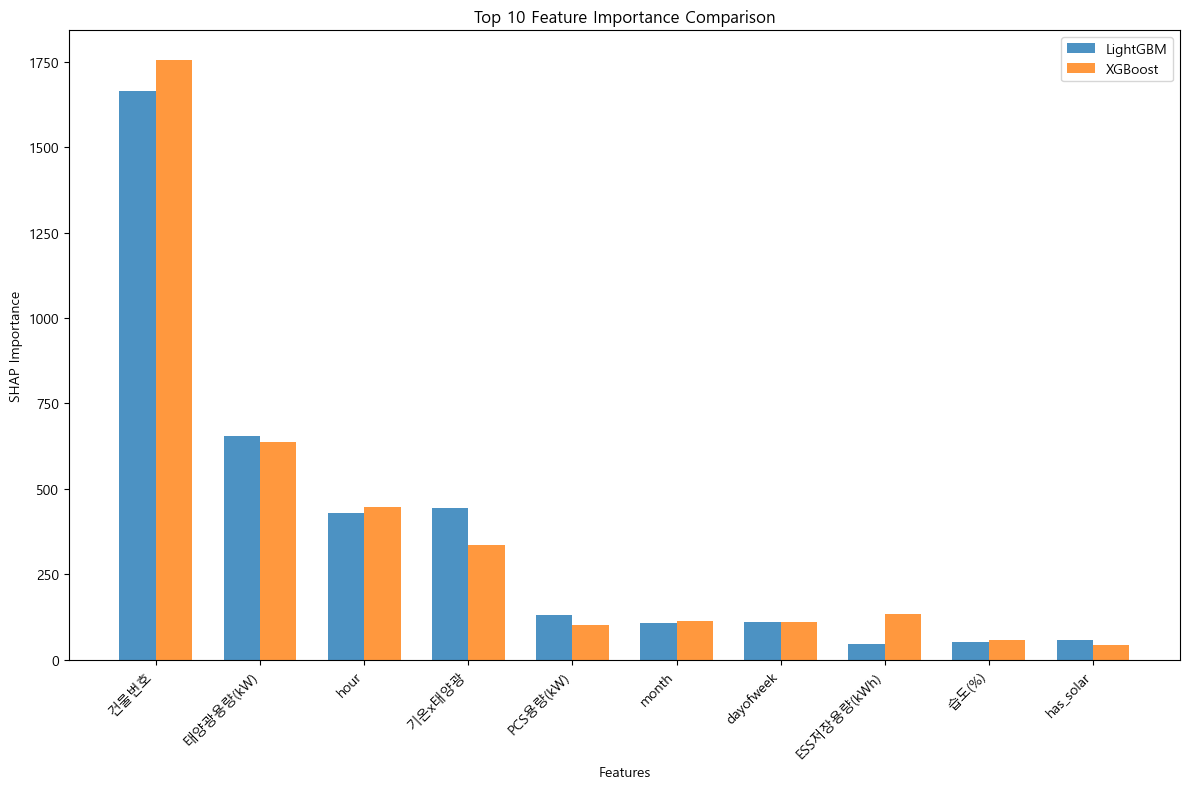

2. LightGBM SHAP 요약 플롯


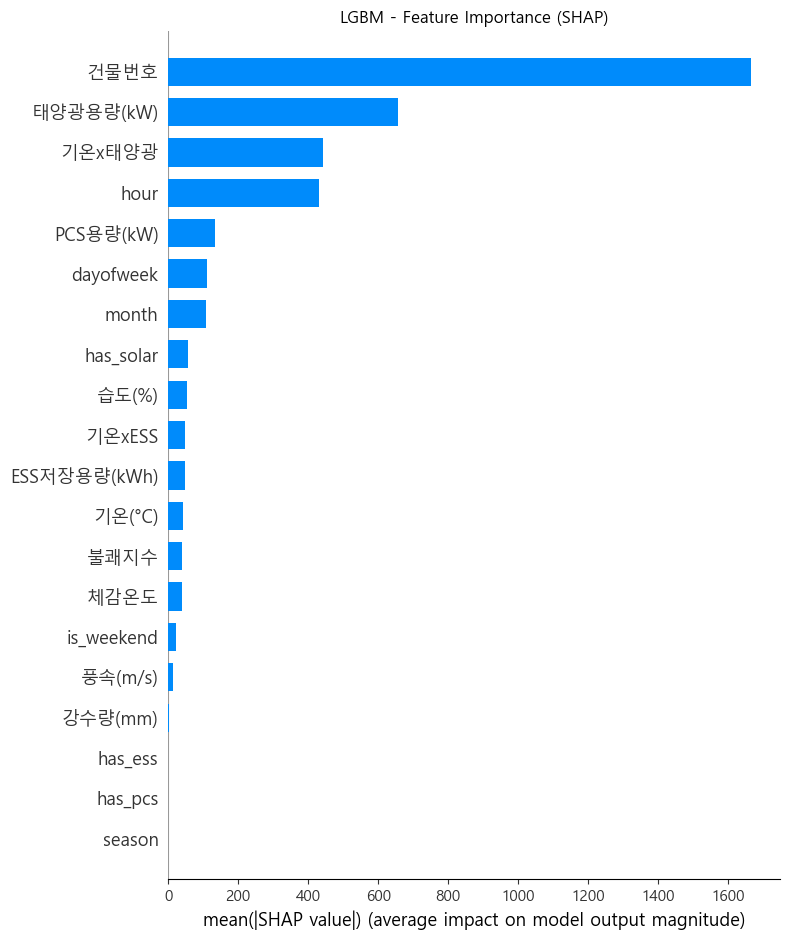

3. XGBoost SHAP 요약 플롯


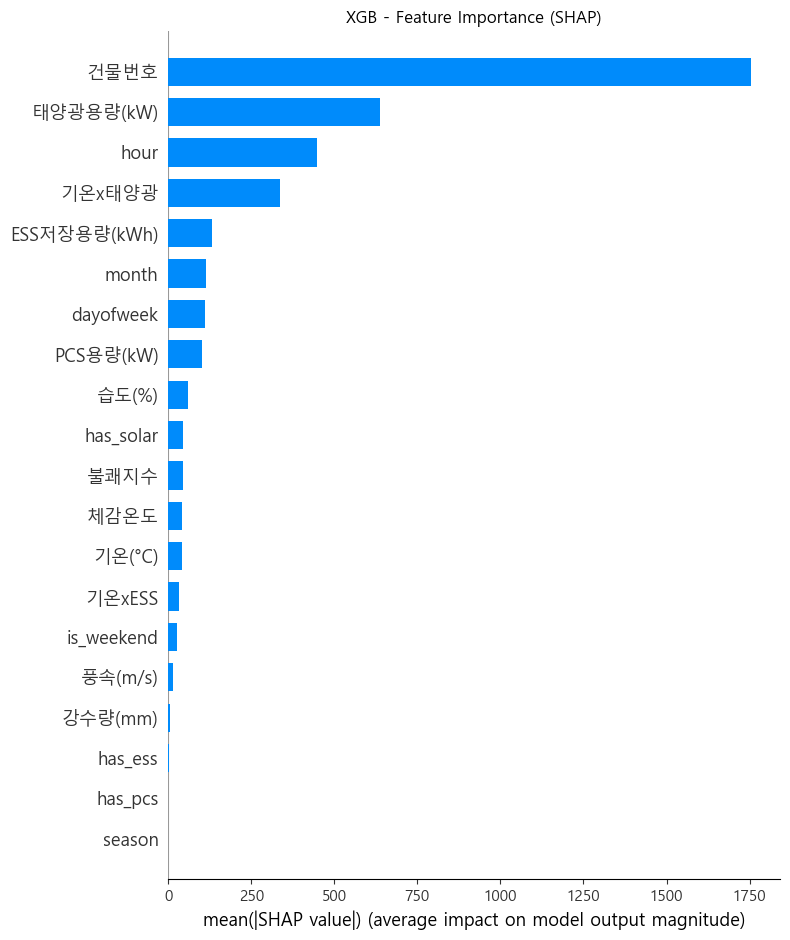

In [ ]:
model, predictions = run_ensemble_with_shap(merged_df)
quick_shap_analysis(model)